In [1]:
import pandas as pd

In [40]:
df = pd.read_table('edited_RMBase_hg19_all_m6A_site.txt')
df.head()

,chromosome,modStart,modEnd,modId,score,strand,modName,modType,supportNum,supportList,pubmedIds,geneName,geneType,region,sequence,motif,score.1
0,chr1,14637,14638,m6A_site_1,0,-,m6A_site_1,m6A,1,GSM1135025,24284625,WASH7P,unprocessed_pseudogene,intron,GGGCCGTTGCTCTGACATGGACACAGCCAGGACAAGCTGCT,371.87,NaN
1,chr1,14661,14662,m6A_site_2,0,-,m6A_site_2,m6A,1,GSM1135025,24284625,WASH7P,unprocessed_pseudogene,intron,ACCTTCCCCCCCAGACCCAGACTTGGGCCGTTGCTCTGACA,344.64,NaN
2,chr1,14667,14668,m6A_site_3,0,-,m6A_site_3,m6A,1,GSM1135025,24284625,WASH7P,unprocessed_pseudogene,intron,CATGACACCTTCCCCCCCAGACCCAGACTTGGGCCGTTGCT,294.79,NaN
3,chr1,14765,14766,m6A_site_4,0,-,m6A_site_4,m6A,1,GSM1135025,24284625,WASH7P,unprocessed_pseudogene,intron,AGCCTTTGCCCGCGTGTCAGACTCCATCCCTCCTCTGCCGC,344.64,NaN
4,chr1,135158,135159,m6A_site_5,0,-,m6A_site_5,m6A,11,"GSE65380,GSM1272358,GSM1272360,GSM1272362,GSM1...",25456834,"RP11-34P13.15,AL627309.1","processed_pseudogene,protein_coding","exon,utr3",CGGCCTCGGCCTCACAGCGGACTCTCCACGCCCAGCTAGCT,419.59,NaN


In [42]:
df['geneName'] = df['geneName'].str.split(',', expand=True).loc[:, 0]

In [44]:
df['geneName'].str.contains('TCF12').sum()

44

In [45]:
df.loc[df['geneName'].str.contains('TCF12'), :].head()

,chromosome,modStart,modEnd,modId,score,strand,modName,modType,supportNum,supportList,pubmedIds,geneName,geneType,region,sequence,motif,score.1
146072,chr15,57210895,57210896,m6A_site_146253,0,+,m6A_site_146253,m6A,9,"GSM1339409,GSM1339421,GSM1339433,GSM1339435,GS...",24981863,TCF12,"protein_coding,processed_transcript","utr5,exon",AAAAATGTCCGCCTGAAGAGACCCACAAGTTCTATTCGGGG,294.79,NaN
146073,chr15,57210918,57210919,m6A_site_146254,0,+,m6A_site_146254,m6A,10,"GSM1339409,GSM1339421,GSM1339433,GSM1339435,GS...",24981863,TCF12,"protein_coding,processed_transcript","utr5,exon",CACAAGTTCTATTCGGGGGGACCGACAGCCCGCCCCGGGAG,369.74,NaN
146074,chr15,57210979,57210980,m6A_site_146255,0,+,m6A_site_146255,m6A,10,"GSM1339409,GSM1339421,GSM1339433,GSM1339435,GS...",24981863,TCF12,"processed_transcript,protein_coding","exon,utr5",AAGCCGCCTCCCCCTCCCAGACCCGAGAGCTCGTGCGGGGC,294.79,NaN
146075,chr15,57211007,57211008,m6A_site_146256,0,+,m6A_site_146256,m6A,4,"GSM2010450,GSM2010454,GSM2010456,GSM2483507",NaN,TCF12,"processed_transcript,protein_coding","exon,utr5",GCTCGTGCGGGGCAAAGTGAACCGAGCCGCTGGGCGGTGCA,299.78,NaN
146076,chr15,57211064,57211065,m6A_site_146257,0,+,m6A_site_146257,m6A,4,"GSM2010450,GSM2010454,GSM2010456,GSM2483507",NaN,TCF12,"processed_transcript,protein_coding","exon,utr5",CGTTCTCCCGGCCAAAGTGAACTTTAATCGGGGTGGTTGGA,349.63,NaN


In [46]:
df.loc[df['geneName'].str.contains('TCF12'), :].groupby('geneName').size()

geneName
TCF12    44
dtype: int64

In [47]:
df.groupby('geneName').size().shape

(23347,)

In [48]:
(df.groupby('geneName').size() >= 44).sum()

2612

In [49]:
df.groupby('geneName').size().max()

446

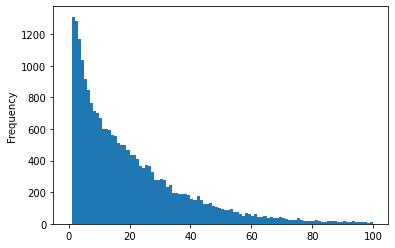

In [50]:
df.groupby('geneName').size().plot.hist(bins=100, range=(0, 100))

In [51]:
df.groupby('geneName').size().sort_values().tail()

geneName
MKI67     279
AHNAK     282
AHNAK2    296
TTN       333
DST       446
dtype: int64

In [83]:
df.loc[df['supportNum'] > 1, :]

,chromosome,modStart,modEnd,modId,score,strand,modName,modType,supportNum,supportList,pubmedIds,geneName,geneType,region,sequence,motif,score.1,Number_amino_acids
4,chr1,135158,135159,m6A_site_5,0,-,m6A_site_5,m6A,11,"GSE65380,GSM1272358,GSM1272360,GSM1272362,GSM1...",25456834,RP11-34P13.15,"processed_pseudogene,protein_coding","exon,utr3",CGGCCTCGGCCTCACAGCGGACTCTCCACGCCCAGCTAGCT,419.59,NaN,NaN
5,chr1,135246,135247,m6A_site_6,0,-,m6A_site_6,m6A,12,"GSE65380,GSM1272358,GSM1272360,GSM1272362,GSM1...","25456834,27371828",RP11-34P13.15,"processed_pseudogene,protein_coding","exon,utr3",GCAGCCTCTTCAGGCGCAGAACTTGATCTCCAGTCGGCCTT,349.63,NaN,NaN
7,chr1,139004,139005,m6A_site_8,0,-,m6A_site_8,m6A,2,"GSE65380,GSM2460350",NaN,AL627309.1,protein_coding,cds,CCAAAACTTACTCAAGTCAGACTCTCTAGTCCCAACTGCTG,344.64,NaN,NaN
8,chr1,139019,139020,m6A_site_9,0,-,m6A_site_9,m6A,2,"GSE65380,GSM2460350",NaN,AL627309.1,protein_coding,cds,ACATCATCTCCGGGCCCAAAACTTACTCAAGTCAGACTCTC,274.68,NaN,NaN
9,chr1,139039,139040,m6A_site_10,0,-,m6A_site_10,m6A,2,"GSE65380,GSM2460350",NaN,AL627309.1,protein_coding,cds,CGGCCAACTCCTGTCCCAGGACATCATCTCCGGGCCCAAAA,371.87,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477446,chrY,21906414,21906415,m6A_site_478160,0,-,m6A_site_478160,m6A,3,"GSM1339411,GSM1339437,GSM2283214","24981863,27371828",KDM5D,protein_coding,cds,GCATTAAGGCCCGACATGGAACCGGGGTGTGACGAGTTCCT,299.78,NaN,1539.0
477447,chrY,21906575,21906576,m6A_site_478161,0,-,m6A_site_478161,m6A,2,"GSM1339411,GSM1339437",24981863,KDM5D,protein_coding,utr5,GTCAAGATGGTGGCTGTAAAACTAGGATCCCTGACGATTGG,274.68,NaN,1539.0
477448,chrY,22741508,22741509,m6A_site_478162,0,+,m6A_site_478162,m6A,18,"GSM1339403,GSM1339405,GSM1339407,GSM1339409,GS...",24981863,EIF1AY,"protein_coding,processed_transcript","cds,exon",ATTAGGTAAAGGAGGTAAAAACAGGCGCAGGGGTAAAAATG,226.96,NaN,144.0
477449,chrY,22741572,22741573,m6A_site_478163,0,+,m6A_site_478163,m6A,12,"GSM1339403,GSM1339405,GSM1339407,GSM1339411,GS...",24981863,EIF1AY,"processed_transcript,protein_coding","exon,cds",TTGGTGTTTAAAGAGGATGGACAAGGTAAGACTTTTCAACT,371.87,NaN,144.0


In [85]:
df.loc[df['supportNum'] > 1, :].groupby('geneName').size()['TCF12']

38

In [86]:
(df.loc[df['supportNum'] > 1, :].groupby('geneName').size() >= df.loc[df['supportNum'] > 1, :].groupby('geneName').size()['TCF12']).mean()

0.11944311089774363

In [56]:
# get the gene size
from Bio import SeqIO

def get_gene_name(s):
    for x in s.split():
        if x.startswith('GN='):
            return x[3:]


n_aa = {get_gene_name(r.description): len(r.seq) for r in SeqIO.parse('UP000005640_9606.fasta', format='fasta')}
df['Number_amino_acids'] = df['geneName'].map(n_aa)

In [87]:
n_m6A = df.groupby('geneName').size().sort_values()
n_m6A = n_m6A[n_m6A.index.isin(n_aa.keys())]
density = n_m6A / n_m6A.index.map(n_aa)
(density >= density['TCF12']).mean()

0.3042403746097815

In [88]:
n_m6A = df.loc[df['supportNum'] > 1, :].groupby('geneName').size().sort_values()
n_m6A = n_m6A[n_m6A.index.isin(n_aa.keys())]
density = n_m6A / n_m6A.index.map(n_aa)
(density >= density['TCF12']).mean()

0.30238635582147033

In [89]:
density.shape

(14541,)

In [91]:
density['ATF3']

0.08839779005524862

In [95]:
df.loc[df['geneName'] == 'TCF12', 'pubmedIds'].unique()

array(['24981863', nan, '27773535', '24284625,24209618',
       '24284625,24209618,24981863,27773535,22608085',
       '24284625,24209618,24981863,27773535,22575960,22608085',
       '24284625,24209618,25456834,24981863,27773535,22575960,22608085',
       '24284625,24209618,24981863,22575960,22608085',
       '24284625,24209618,24981863,22608085',
       '24284625,24981863,22608085', '24284625', '24284625,24981863',
       '24284625,22608085'], dtype=object)